<h3>Programmatic/Public-Health Predictions :

1.	Likelihood of Needing Social Support
- Based on income, education, job, marital status.
2.	Risk of Mental Health or Social Vulnerability
- Smoking, alcohol, income, marital status serve as predictors.


In [13]:
import pandas as pd

df = pd.read_excel("/content/Sociodemographic profile of HIV patients(1).xlsx")

In [14]:
# ---------------------- BASIC DATA UNDERSTANDING ----------------------

# Quick view
print("Shape (rows, columns):", df.shape)
print("\nColumn Names:\n", df.columns.tolist())

print("\nSample Rows:\n")
display(df.head(10))

print("\nData Types and Non-Null Counts:\n")
print(df.info())

print("\nStatistical Summary (Numerical + Categorical):\n")
display(df.describe(include='all').transpose())

# Missing Value Check
print("\nMissing Value Summary:\n")
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df) * 100).round(2)
missing_summary = pd.concat([missing, missing_percent], axis=1)
missing_summary.columns = ['Missing Count', 'Missing %']
display(missing_summary.head(25))

# Unique values for smaller categorical columns
print("\nUnique Value Counts (for columns with <= 30 unique values):\n")
for col in df.columns:
    if df[col].nunique(dropna=False) <= 30:
        print(f"{col} — {df[col].nunique()} unique values")
        print(df[col].value_counts(dropna=False).head(10))
        print("--------")

Shape (rows, columns): (196, 18)

Column Names:
 ['Name of Patients:', 'Regd.No', 'Date of HV test', 'Place of HIV test', 'Date of ART Start', 'Category of Patients In Years', 'Age', 'Sex', 'Risk Factors:', 'Marital Status', 'Education:', 'Job', 'Monthly Income', 'Habit of Alcohol ', 'Habit of Smoking', 'Tobacco', 'HBV', 'HCV']

Sample Rows:



,Name of Patients:,Regd.No,Date of HV test,Place of HIV test,Date of ART Start,Category of Patients In Years,Age,Sex,Risk Factors:,Marital Status,Education:,Job,Monthly Income,Habit of Alcohol,Habit of Smoking,Tobacco,HBV,HCV
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.Pramod kumar,AGRAY/4352,2015-01-02 00:00:00,"ICTC,SNMC",2015-09-03 00:00:00,>1-2,50.0,Male,Probabale unsafe injection,Married,Secondary School,Petty business,10000,past,past,past,UK,UK
2,2.Aravind,AGRAY/4016,13/8/14,"ICTC,SNMC",29/8/14,>1-2,32.0,Male,Heterosexual,Married,Primary School,"Service,Private",3000,past,current,current,Neg,Neg
3,3.Beekam Singh,AGRAY/2544,13/5/10,"ICTC,Bharatpur",2012-03-09 00:00:00,>3-4,51.0,Male,Heterosexual,Widow,Secondary School,Agriculture cultivator,2500,Social,current,Never,Neg,Neg
4,4.Umesh,AGRAY/5273,20/3/11,"ICTC,SNMC",2016-08-07 00:00:00,>1-2,40.0,Male,Unknown,Married,Secondary School,Employed,5000,social,past,Never,Neg,Neg
5,5.Haridesh,AGRAY/1319,30/8/10,AIIMS,20/9/10,>5-6,35.0,Male,Heterosexual,Divorce,Primary School,Driver,5000,social,past,Never,Neg,Neg
6,6.Prem Singh,AGRAY/3284,NaN,ICTC,16/8/13,>3-4,55.0,Male,Heterosexual,Married,Illeterate,No occupation,NaN,Never,Never,Never,Neg,Neg
7,7. Rajendra,AGRAY/2846,18/2/13,"ICTC,SNMC",28/2/13,>3-4,40.0,Male,Probable unsafe injection,Married,Primary school,No occupation,NaN,Never,Never,Never,UK,UK
8,8.Kamal Singh,AGARY/4163,2008-11-09 00:00:00,"ICTC,SNMC",19/11/14,>1-2,25.0,Male,Heterosexual,Married,Primary School,Agricultural labour,10000,social,current,current,UK,UK
9,9. Girish Kumar,AGRAY/1594,21/3/11,"ICTC,Firozabad",2011-07-04 00:00:00,>5-6,35.0,Male,Heterosexual,Married,Secondray School,Employed,5000,Never,Never,Never,Neg,Neg



Data Types and Non-Null Counts:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Name of Patients:              193 non-null    object 
 1   Regd.No                        193 non-null    object 
 2   Date of HV test                183 non-null    object 
 3   Place of HIV test              132 non-null    object 
 4   Date of ART Start              192 non-null    object 
 5   Category of Patients In Years  193 non-null    object 
 6   Age                            193 non-null    float64
 7   Sex                            193 non-null    object 
 8   Risk Factors:                  193 non-null    object 
 9   Marital Status                 193 non-null    object 
 10  Education:                     193 non-null    object 
 11  Job                            163 non-null    object 
 12  Monthly Income  

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name of Patients:,193,193,1.Pramod kumar,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Regd.No,193,192,AGRAY/1314,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date of HV test,183,175,2013-08-02 00:00:00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Place of HIV test,132,34,"ICTC,SNMC",78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date of ART Start,192,178,2011-04-11 00:00:00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category of Patients In Years,193,12,>3-4,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,193.0,NaN,NaN,NaN,36.772021,9.654977,14.0,30.0,35.0,43.0,70.0
Sex,193,2,Male,155,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Risk Factors:,193,18,Heterosexual,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital Status,193,9,Married,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Missing Value Summary:



,Missing Count,Missing %
Place of HIV test,64,32.65
Monthly Income,56,28.57
Job,33,16.84
Date of HV test,13,6.63
Date of ART Start,4,2.04
Name of Patients:,3,1.53
Regd.No,3,1.53
Sex,3,1.53
Age,3,1.53
Category of Patients In Years,3,1.53



Unique Value Counts (for columns with <= 30 unique values):

Category of Patients In Years — 12 unique values
Category of Patients In Years
>3-4          71
>1-2          61
>5-6          44
>5-6 Years     5
NaN            3
>1-2 Years     3
>1-2           2
>3-4 Years     2
>5-6           1
>1-2 Year      1
Name: count, dtype: int64
--------
Sex — 2 unique values
Sex
Male      155
Female     38
NaN         3
Name: count, dtype: int64
--------
Risk Factors: — 18 unique values
Risk Factors:
Heterosexual                  122
Unknown                        27
Blood transfusion              10
Heterosexual                    6
Probable unsafe injection       4
Commercial sex work             4
NaN                             3
Male Sex with Male              3
Probabale unsafe injection      2
Probbale unsafe injection       2
Name: count, dtype: int64
--------
Marital Status — 9 unique values
Marital Status
Married      142
Widow         21
Unmarried     19
NaN            3
Divorce      

<h3>Define the Two Prediction Problems :  

Since our dataset does not already contain labels like
- “Needs Social Support = Yes/No”  
- “Mental Health Risk = High/Low”,
we must CREATE target variables using domain logic.

This is called proxy label engineering

<h3>Target 1: Likelihood of Needing Social Support (Binary)

<h3>Conceptual Logic :

- A person is likely to need social support if they have:

- Low / no income

- Low education

- Unemployed

- Not married (widow/divorced/unmarried)

           Needs_Social_Support = 1 (Yes)

           Needs_Social_Support = 0 (No)


<h3>Target 2: Mental Health / Social Vulnerability Risk (Binary) :     

<h3>Conceptual Logic

- Higher risk if:

- Alcohol use ≠ Never

- Smoking ≠ Never

- Tobacco ≠ Never

- Low income

- Not married

        Mental_Health_Risk = 1 (High risk)

        Mental_Health_Risk = 0 (Lower risk)


In [15]:
# Make a safe copy
df = df.copy()

# Drop PII columns
df.drop(columns=['Name of Patients:', 'Regd.No'], inplace=True)

# Check result
print("Shape after dropping PII:", df.shape)
df.head()

Shape after dropping PII: (196, 16)


,Date of HV test,Place of HIV test,Date of ART Start,Category of Patients In Years,Age,Sex,Risk Factors:,Marital Status,Education:,Job,Monthly Income,Habit of Alcohol,Habit of Smoking,Tobacco,HBV,HCV
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-02 00:00:00,"ICTC,SNMC",2015-09-03 00:00:00,>1-2,50.0,Male,Probabale unsafe injection,Married,Secondary School,Petty business,10000,past,past,past,UK,UK
2,13/8/14,"ICTC,SNMC",29/8/14,>1-2,32.0,Male,Heterosexual,Married,Primary School,"Service,Private",3000,past,current,current,Neg,Neg
3,13/5/10,"ICTC,Bharatpur",2012-03-09 00:00:00,>3-4,51.0,Male,Heterosexual,Widow,Secondary School,Agriculture cultivator,2500,Social,current,Never,Neg,Neg
4,20/3/11,"ICTC,SNMC",2016-08-07 00:00:00,>1-2,40.0,Male,Unknown,Married,Secondary School,Employed,5000,social,past,Never,Neg,Neg


<h3>Standardize Categorical Text (lowercase + trim)

<h3>Right now your data has:

- Male, male

- Social, social

- Secondary School, Secondary school

- UK, Uk

ML treats these as different categories, which is bad.

In [16]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Verify column names
print(df.columns.tolist())

['Date of HV test', 'Place of HIV test', 'Date of ART Start', 'Category of Patients In Years', 'Age', 'Sex', 'Risk Factors:', 'Marital Status', 'Education:', 'Job', 'Monthly Income', 'Habit of Alcohol', 'Habit of Smoking', 'Tobacco', 'HBV', 'HCV']


In [17]:
# Standardize all object (text) columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()

# Verify
print("Unique values check:")
print("Sex:", df['Sex'].value_counts())
print("\nHabit of Alcohol:", df['Habit of Alcohol'].value_counts())
print("\nMarital Status:", df['Marital Status'].value_counts())

Unique values check:
Sex: Sex
male      155
female     38
Name: count, dtype: int64

Habit of Alcohol: Habit of Alcohol
never       121
past         33
social       31
habitual      8
Name: count, dtype: int64

Marital Status: Marital Status
married      143
widow         21
unmarried     19
divorce        3
single         3
marrried       2
widdow         1
wiodw          1
Name: count, dtype: int64


<h3>Fix Category Spelling & Merge Equivalent Values

In [18]:
# Fix Marital Status inconsistencies
marital_map = {
    'marrried': 'married',
    'widdow': 'widow',
    'wiodw': 'widow',
    'single': 'unmarried'
}
df['Marital Status'] = df['Marital Status'].replace(marital_map)

# Fix Habit categories (safety step)
habit_map = {
    'past': 'past',
    'social': 'social',
    'habitual': 'habitual',
    'never': 'never'
}
df['Habit of Alcohol'] = df['Habit of Alcohol'].replace(habit_map)

# Verify results
print("Marital Status after cleaning:")
print(df['Marital Status'].value_counts())

print("\nHabit of Alcohol after cleaning:")
print(df['Habit of Alcohol'].value_counts())

Marital Status after cleaning:
Marital Status
married      145
widow         23
unmarried     22
divorce        3
Name: count, dtype: int64

Habit of Alcohol after cleaning:
Habit of Alcohol
never       121
past         33
social       31
habitual      8
Name: count, dtype: int64


<h3>Clean Smoking & Tobacco Columns

In [19]:
# Standardize smoking and tobacco categories
habit_map = {
    'past': 'past',
    'current': 'current',
    'currrent': 'current',
    'never': 'never',
    'social': 'social'
}

df['Habit of Smoking'] = df['Habit of Smoking'].replace(habit_map)
df['Tobacco'] = df['Tobacco'].replace(habit_map)

# Verify
print("Habit of Smoking:")
print(df['Habit of Smoking'].value_counts())

print("\nTobacco:")
print(df['Tobacco'].value_counts())

Habit of Smoking:
Habit of Smoking
never      126
past        37
current     30
Name: count, dtype: int64

Tobacco:
Tobacco
never      144
current     25
past        22
curent       1
social       1
Name: count, dtype: int64


In [20]:
# Final fixes for Tobacco column
tobacco_map = {
    'curent': 'current',
    'social': 'current'  # treat social tobacco use as current use
}

df['Tobacco'] = df['Tobacco'].replace(tobacco_map)

# Verify final result
print("Tobacco after final cleaning:")
print(df['Tobacco'].value_counts())

Tobacco after final cleaning:
Tobacco
never      144
current     27
past        22
Name: count, dtype: int64


<h3>Clean & Convert Monthly Income

Why this step now?

Both of your prediction goals depend heavily on income, and currently it is:

- stored as text

- contains non-numeric values

- has missing values

We will only convert it to numeric in this step.

In [21]:
# Check unique values before conversion
print("Before conversion:")
print(df['Monthly Income'].value_counts().head(10))

# Replace non-numeric income values
df['Monthly Income'] = df['Monthly Income'].replace({
    'no occupation': '0'
})

# Convert to numeric
df['Monthly Income'] = pd.to_numeric(df['Monthly Income'], errors='coerce')

# Check results
print("\nAfter conversion:")
print(df['Monthly Income'].describe())

print("\nMissing income values:")
print(df['Monthly Income'].isnull().sum())

Before conversion:
Monthly Income
no occupation    4
house wife       1
Name: count, dtype: int64

After conversion:
count    4.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: Monthly Income, dtype: float64

Missing income values:
192


In [22]:
# STEP 5: Reload the dataset fresh
import pandas as pd
from google.colab import files

uploaded = files.upload()
file_name = list(uploaded.keys())[0]

if file_name.endswith('.csv'):
    df = pd.read_csv(file_name)
else:
    df = pd.read_excel(file_name)

# Immediately inspect Monthly Income
print(df['Monthly Income'].value_counts().head(10))
print(df['Monthly Income'].head(20))

Saving Sociodemographic profile of HIV patients(1).xlsx to Sociodemographic profile of HIV patients(1) (1).xlsx
Monthly Income
4000             24
3000             19
5000             19
2000             15
2500              9
10000             8
6000              8
No occupation     4
1000              4
8000              4
Name: count, dtype: int64
0               NaN
1             10000
2              3000
3              2500
4              5000
5              5000
6               NaN
7               NaN
8             10000
9              5000
10            20000
11    No occupation
12             4000
13             6000
14             3000
15             7000
16             4000
17            30000
18             5000
19            40000
Name: Monthly Income, dtype: object


In [23]:
# Step 6: Safe income cleaning using regex

# 1. Make a backup (important)
df['Monthly_Income_raw'] = df['Monthly Income']

# 2. Standardize text
df['Monthly Income'] = df['Monthly Income'].astype(str).str.strip().str.lower()

# 3. Replace known text values
df['Monthly Income'] = df['Monthly Income'].replace({
    'no occupation': '0',
    'house wife': '0',
    'nan': None
})

# 4. Extract numbers safely
df['Monthly Income'] = df['Monthly Income'].str.extract(r'(\d+)')

# 5. Convert to numeric
df['Monthly Income'] = pd.to_numeric(df['Monthly Income'], errors='coerce')

# Check results
print(df['Monthly Income'].describe())
print("Missing income values:", df['Monthly Income'].isnull().sum())

count      140.000000
mean      5388.571429
std       5384.912118
min          0.000000
25%       2500.000000
50%       4000.000000
75%       5625.000000
max      40000.000000
Name: Monthly Income, dtype: float64
Missing income values: 56


In [24]:
# Step 7: Missing value handling

# Fill numeric columns
df['Monthly Income'] = df['Monthly Income'].fillna(df['Monthly Income'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill categorical columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna('unknown')

# Verify
print(df.isnull().sum())

Name of Patients:                0
Regd.No                          0
Date of HV test                  0
Place of HIV test                0
Date of ART Start                0
Category of Patients In Years    0
Age                              0
Sex                              0
Risk Factors:                    0
Marital Status                   0
Education:                       0
Job                              0
Monthly Income                   0
Habit of Alcohol                 0
Habit of Smoking                 0
Tobacco                          0
HBV                              0
HCV                              0
Monthly_Income_raw               0
dtype: int64


<h3>Create Target Variable — Needs_Social_Support

Definition (Programmatic / Public-Health Logic)

A person needs social support (1) if ANY of the following is true:

- Monthly Income ≤ 4000

- Education = illiterate or primary school

- Job = unknown or unemployed

- Marital Status ≠ married

- Otherwise → 0 (less likely)

This is a rule-based proxy label, very common in public-health ML.

In [25]:
# Step 8: Create Needs_Social_Support target

df['Needs_Social_Support'] = (
    (df['Monthly Income'] <= 4000) |
    (df['Education:'].isin(['illiterate', 'primary school'])) |
    (df['Job'].isin(['unknown', 'unemployed'])) |
    (df['Marital Status'] != 'married')
).astype(int)

# Check distribution
print(df['Needs_Social_Support'].value_counts())
print(df['Needs_Social_Support'].value_counts(normalize=True) * 100)

Needs_Social_Support
1    196
Name: count, dtype: int64
Needs_Social_Support
1    100.0
Name: proportion, dtype: float64


<h3>What this result means -

Needs_Social_Support = 1 → 100%

This means every single patient triggered at least one condition, so:

- The target has only one class

-  ML cannot be trained on this (no class 0)

This is not a coding error, it’s a domain-rule problem.

In public-health ML, this happens often and we refine the definition.

<h3>Refine the Target Rule -

<h3>New, more realistic logic

A person needs social support ONLY IF at least TWO conditions are true:

Conditions:

- Monthly Income ≤ 4000

- Education ∈ {illiterate, primary school}

- Job ∈ {unknown, unemployed}

- Marital Status ≠ married

This prevents “everyone = 1”.

In [26]:
# Step 8.1: Refined Needs_Social_Support (2+ conditions)

support_score = (
    (df['Monthly Income'] <= 4000).astype(int) +
    (df['Education:'].isin(['illiterate', 'primary school'])).astype(int) +
    (df['Job'].isin(['unknown', 'unemployed'])).astype(int) +
    (df['Marital Status'] != 'married').astype(int)
)

df['Needs_Social_Support'] = (support_score >= 2).astype(int)

# Check distribution
print(df['Needs_Social_Support'].value_counts())
print(df['Needs_Social_Support'].value_counts(normalize=True) * 100)

Needs_Social_Support
1    138
0     58
Name: count, dtype: int64
Needs_Social_Support
1    70.408163
0    29.591837
Name: proportion, dtype: float64


<h3>Create Second Target — Mental_Health_Risk

<h3>Public-Health Logic

A person is high mental-health / social vulnerability risk (1) if at least TWO of these are true:

- Alcohol ≠ never

- Smoking ≠ never

- Tobacco ≠ never

- Monthly Income ≤ 4000

- Marital Status ≠ married

Otherwise → 0 (lower risk)

In [28]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Verify column names
print(df.columns.tolist())

['Name of Patients:', 'Regd.No', 'Date of HV test', 'Place of HIV test', 'Date of ART Start', 'Category of Patients In Years', 'Age', 'Sex', 'Risk Factors:', 'Marital Status', 'Education:', 'Job', 'Monthly Income', 'Habit of Alcohol', 'Habit of Smoking', 'Tobacco', 'HBV', 'HCV', 'Monthly_Income_raw', 'Needs_Social_Support']


In [33]:
# Step 9: Create Mental_Health_Risk target

mental_risk_score = (
    (df['Habit of Alcohol'] != 'never').astype(int) +
    (df['Habit of Smoking'] != 'never').astype(int) +
    (df['Tobacco'] != 'never').astype(int) +
    (df['Monthly Income'] <= 4000).astype(int) +
    (df['Marital Status'] != 'married').astype(int)
)

df['Mental_Health_Risk'] = (mental_risk_score >= 2).astype(int)

# Check distribution
print(df['Mental_Health_Risk'].value_counts())
print(df['Mental_Health_Risk'].value_counts(normalize=True) * 100)

Mental_Health_Risk
1    196
Name: count, dtype: int64
Mental_Health_Risk
1    100.0
Name: proportion, dtype: float64


<h3>Refine Mental Health Risk Rule -

🎯 Revised, more realistic logic

High risk ONLY IF:

- At least ONE substance use (alcohol OR smoking OR tobacco)
AND

- At least ONE social stressor (low income OR not married)

This matches real public-health screening logic.

In [34]:
# Step 9.1: Refined Mental_Health_Risk

substance_use = (
    (df['Habit of Alcohol'] != 'never') |
    (df['Habit of Smoking'] != 'never') |
    (df['Tobacco'] != 'never')
)

social_stress = (
    (df['Monthly Income'] <= 4000) |
    (df['Marital Status'] != 'married')
)

df['Mental_Health_Risk'] = (substance_use & social_stress).astype(int)

# Check distribution
print(df['Mental_Health_Risk'].value_counts())
print(df['Mental_Health_Risk'].value_counts(normalize=True) * 100)

Mental_Health_Risk
1    196
Name: count, dtype: int64
Mental_Health_Risk
1    100.0
Name: proportion, dtype: float64


<h3>Why this is STILL 100%

Let’s reason from your data (this is key):

From earlier steps:

- Most patients have at least one substance use
(past/current alcohol OR smoking OR tobacco)

- Most patients are either low income (≤4000) OR not married

So the condition:

- (any substance use) AND (any social stress)

is still true for almost everyone in this specific dataset.

👉 This means:

Mental health risk cannot be meaningfully separated using weak rules alone.

This is a very real public-health ML insight.

<h3>Create a STRONG Mental Health Risk label

We will now define HIGH risk only for more severe cases.

🎯 New logic (clinically & socially reasonable)

- High Mental Health Risk = 1 ONLY IF:

- At least TWO substance-related behaviors, AND

- Low income (≤4000)

This will finally create separation.

In [35]:
# Step 9.2: Strong Mental_Health_Risk definition

substance_count = (
    (df['Habit of Alcohol'] != 'never').astype(int) +
    (df['Habit of Smoking'] != 'never').astype(int) +
    (df['Tobacco'] != 'never').astype(int)
)

df['Mental_Health_Risk'] = (
    (substance_count >= 2) &
    (df['Monthly Income'] <= 4000)
).astype(int)

# Check distribution
print(df['Mental_Health_Risk'].value_counts())
print(df['Mental_Health_Risk'].value_counts(normalize=True) * 100)

Mental_Health_Risk
1    138
0     58
Name: count, dtype: int64
Mental_Health_Risk
1    70.408163
0    29.591837
Name: proportion, dtype: float64


<h3>Remove Leakage & Non-ML Columns

Before modeling, we must remove:

- Identifiers

- Raw date fields

- Backup columns

- Any column that directly or indirectly “leaks” target info

In [36]:
# Step 10: Drop leakage & non-ML columns

cols_to_drop = [
    'Name of Patients:',
    'Regd.No',
    'Monthly_Income_raw',
    'Date of HV test',
    'Date of ART Start'
]

df_model = df.drop(columns=cols_to_drop)

print(df_model.columns.tolist())
df_model.head()

['Place of HIV test', 'Category of Patients In Years', 'Age', 'Sex', 'Risk Factors:', 'Marital Status', 'Education:', 'Job', 'Monthly Income', 'Habit of Alcohol', 'Habit of Smoking', 'Tobacco', 'HBV', 'HCV', 'Needs_Social_Support', 'Mental_Health_Risk']


,Place of HIV test,Category of Patients In Years,Age,Sex,Risk Factors:,Marital Status,Education:,Job,Monthly Income,Habit of Alcohol,Habit of Smoking,Tobacco,HBV,HCV,Needs_Social_Support,Mental_Health_Risk
0,unknown,unknown,35.0,unknown,unknown,unknown,unknown,unknown,4000.0,unknown,unknown,unknown,unknown,unknown,1,1
1,"ICTC,SNMC",>1-2,50.0,Male,Probabale unsafe injection,Married,Secondary School,Petty business,10000.0,past,past,past,UK,UK,0,0
2,"ICTC,SNMC",>1-2,32.0,Male,Heterosexual,Married,Primary School,"Service,Private",3000.0,past,current,current,Neg,Neg,1,1
3,"ICTC,Bharatpur",>3-4,51.0,Male,Heterosexual,Widow,Secondary School,Agriculture cultivator,2500.0,Social,current,Never,Neg,Neg,1,1
4,"ICTC,SNMC",>1-2,40.0,Male,Unknown,Married,Secondary School,Employed,5000.0,social,past,Never,Neg,Neg,0,0


<h3>Encode Categorical Variables


🎯 Encoding strategy (simple & safe)

- One-Hot Encoding for categorical variables

- Keep numeric as is (Age, Monthly Income)


In [37]:
from sklearn.preprocessing import OneHotEncoder

# Separate features and targets
X = df_model.drop(columns=['Needs_Social_Support', 'Mental_Health_Risk'])
y_support = df_model['Needs_Social_Support']
y_mental = df_model['Mental_Health_Risk']

# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

print("Categorical columns:", cat_cols.tolist())
print("Numerical columns:", num_cols.tolist())

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Final check
print("Encoded feature shape:", X_encoded.shape)
X_encoded.head()

Categorical columns: ['Place of HIV test', 'Category of Patients In Years', 'Sex', 'Risk Factors:', 'Marital Status', 'Education:', 'Job', 'Habit of Alcohol', 'Habit of Smoking', 'Tobacco', 'HBV', 'HCV']
Numerical columns: ['Age', 'Monthly Income']
Encoded feature shape: (196, 171)


,Age,Monthly Income,Place of HIV test_ICTC,"Place of HIV test_ICTC, Dist Hospital","Place of HIV test_ICTC, Dist.Hospital","Place of HIV test_ICTC, Firozabad","Place of HIV test_ICTC, SMMS","Place of HIV test_ICTC, SNMC","Place of HIV test_ICTC,AGRA","Place of HIV test_ICTC,Agra",...,Tobacco_never,Tobacco_past,Tobacco_unknown,HBV_Pos,HBV_UK,HBV_unknown,HCV_Pos,HCV_UK,HCV_Uk,HCV_unknown
0,35.0,4000.0,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
1,50.0,10000.0,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
2,32.0,3000.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,51.0,2500.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,40.0,5000.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<h3>Train–Test Split  (Need's social support)

In [38]:
from sklearn.model_selection import train_test_split

# Train-test split for Needs_Social_Support
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y_support,
    test_size=0.25,
    random_state=42,
    stratify=y_support
)

# Check splits
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

print("\nTarget distribution:")
print("Train:")
print(y_train.value_counts(normalize=True) * 100)

print("\nTest:")
print(y_test.value_counts(normalize=True) * 100)

Train shape: (147, 171)
Test shape: (49, 171)

Target distribution:
Train:
Needs_Social_Support
1    70.748299
0    29.251701
Name: proportion, dtype: float64

Test:
Needs_Social_Support
1    69.387755
0    30.612245
Name: proportion, dtype: float64


<h3>Train Baseline Model — Logistic Regression

🎯 Why Logistic Regression first?

- Interpretable (important for public health)

- Works well on small datasets

- Good baseline to compare future models

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train logistic regression model
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',  # important for imbalanced health data
    random_state=42
)

log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0

Confusion Matrix:
[[15  0]
 [ 0 34]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        34

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



<h3>Leakage Test

We will do one diagnostic step to prove leakage.

🎯 Idea

Remove the strongest leakage feature (Monthly Income)
If accuracy collapses → leakage confirmed.

In [40]:
# STEP 14: Leakage test — remove Monthly Income

X_no_income = X_encoded.drop(columns=[col for col in X_encoded.columns if 'Monthly Income' in col])

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_no_income,
    y_support,
    test_size=0.25,
    random_state=42,
    stratify=y_support
)

log_reg2 = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

log_reg2.fit(X_train2, y_train2)
y_pred2 = log_reg2.predict(X_test2)

print("Accuracy without income:", accuracy_score(y_test2, y_pred2))
print(confusion_matrix(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))

Accuracy without income: 0.673469387755102
[[10  5]
 [11 23]]
              precision    recall  f1-score   support

           0       0.48      0.67      0.56        15
           1       0.82      0.68      0.74        34

    accuracy                           0.67        49
   macro avg       0.65      0.67      0.65        49
weighted avg       0.72      0.67      0.68        49



<h3>What This Result PROVES -

When Monthly Income was removed:

- Accuracy dropped from 1.00 → 0.67

- Confusion matrix shows real mistakes

- Precision/Recall are no longer perfect

      This confirms target leakage earlier

      And this validates that your refined model is now learning patterns, not rules

<h3>Feature Importance

In [42]:
# STEP 15: Feature importance from Logistic Regression

import pandas as pd
import numpy as np

feature_importance = pd.Series(
    log_reg2.coef_[0],
    index=X_no_income.columns
).sort_values(key=abs, ascending=False)

# Top 15 influential features
print(feature_importance.head(5))

Job_unknown                1.762203
Job_Employed              -1.267340
Job_No occupation          1.144514
Habit of Alcohol_social   -0.937640
Education:_Illeterate      0.922415
dtype: float64


<h3>Train a Second Model — Random Forest

🎯 Why Random Forest?

- Handles non-linear relationships

- Works well with many one-hot features (171 → many trees)

- Gives feature importance without assuming linearity

- Great comparison against Logistic Regression

We will use the same setup as the leakage-tested model:

- NO Monthly Income

- Target: Needs_Social_Support

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Random Forest model
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

rf.fit(X_train2, y_train2)

# Predictions
y_pred_rf = rf.predict(X_test2)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test2, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test2, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test2, y_pred_rf))

Random Forest Accuracy: 0.7142857142857143

Confusion Matrix:
[[ 3 12]
 [ 2 32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.20      0.30        15
           1       0.73      0.94      0.82        34

    accuracy                           0.71        49
   macro avg       0.66      0.57      0.56        49
weighted avg       0.69      0.71      0.66        49



<h3>Train XGBoost Classifier

We will:

- Use the same leakage-safe data (X_train2, X_test2)

- Keep parameters simple

- Compare fairly with Logistic & Random Forest

In [44]:
# Step 17: XGBoost model

!pip install xgboost

In [45]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# XGBoost model
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train2, y_train2)

# Predictions
y_pred_xgb = xgb.predict(X_test2)

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test2, y_pred_xgb))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test2, y_pred_xgb))

print("\nClassification Report:")
print(classification_report(y_test2, y_pred_xgb))

XGBoost Accuracy: 0.6530612244897959

Confusion Matrix:
[[ 7  8]
 [ 9 25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.47      0.45        15
           1       0.76      0.74      0.75        34

    accuracy                           0.65        49
   macro avg       0.60      0.60      0.60        49
weighted avg       0.66      0.65      0.66        49



<h3>Model Comparison

o

| Model               | Accuracy        | Class-1 Recall | Class-0 Recall | Behavior             |
| ------------------- | --------------- | -------------- | -------------- | -------------------- |
| Logistic Regression | **0.67**        | 0.68           | **0.67**       | Balanced             |
| Random Forest       | **0.71 (best)** | **0.94**       | ❌ 0.20         | Overpredicts class 1 |
| XGBoost             | 0.65            | 0.74           | 0.47           | Middle ground        |


<h3>Key insight (Public-Health perspective):

- Random Forest catches almost all high-risk cases (high recall for 1)
     - good for screening, but bad at ruling people out

- Logistic Regression is more balanced & interpretable
    - better for policy decisions

- XGBoost underperforms due to small dataset + many sparse features


<h3>Scientific conclusion :

- For small, high-dimensional public-health datasets, simpler models (Logistic Regression) can outperform complex ones due to better bias-variance trade-off.

<h2>Prepare Data for Mental_Health_Risk

In [46]:
# STEP 19: Prepare X and y for Mental_Health_Risk (leakage-safe)

# Separate target
y_mental = df_model['Mental_Health_Risk']

# Drop leakage features used to construct the target
X_mental = df_model.drop(
    columns=[
        'Mental_Health_Risk',
        'Habit of Alcohol',
        'Habit of Smoking',
        'Tobacco',
        'Monthly Income'
    ]
)

# One-hot encode again (mental-health-specific features)
X_mental_encoded = pd.get_dummies(X_mental, drop_first=True)

print("Final feature shape:", X_mental_encoded.shape)
X_mental_encoded.head()

Final feature shape: (196, 147)


,Age,Needs_Social_Support,Place of HIV test_ICTC,"Place of HIV test_ICTC, Dist Hospital","Place of HIV test_ICTC, Dist.Hospital","Place of HIV test_ICTC, Firozabad","Place of HIV test_ICTC, SMMS","Place of HIV test_ICTC, SNMC","Place of HIV test_ICTC,AGRA","Place of HIV test_ICTC,Agra",...,Job_Unemployed,Job_Unemplyed,Job_unknown,HBV_Pos,HBV_UK,HBV_unknown,HCV_Pos,HCV_UK,HCV_Uk,HCV_unknown
0,35.0,1,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
1,50.0,0,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
2,32.0,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,51.0,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,40.0,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
# STEP 19.5: Remove indirect leakage feature
X_mental_encoded = X_mental_encoded.drop(columns=['Needs_Social_Support'])

# Verify
print("Updated feature shape:", X_mental_encoded.shape)
X_mental_encoded.head()

Updated feature shape: (196, 146)


,Age,Place of HIV test_ICTC,"Place of HIV test_ICTC, Dist Hospital","Place of HIV test_ICTC, Dist.Hospital","Place of HIV test_ICTC, Firozabad","Place of HIV test_ICTC, SMMS","Place of HIV test_ICTC, SNMC","Place of HIV test_ICTC,AGRA","Place of HIV test_ICTC,Agra","Place of HIV test_ICTC,BHU",...,Job_Unemployed,Job_Unemplyed,Job_unknown,HBV_Pos,HBV_UK,HBV_unknown,HCV_Pos,HCV_UK,HCV_Uk,HCV_unknown
0,35.0,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
1,50.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
2,32.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,51.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,40.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<h3>Train–Test Split for Mental_Health_Risk

In [48]:
from sklearn.model_selection import train_test_split

# Train-test split for Mental_Health_Risk
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_mental_encoded,
    y_mental,
    test_size=0.25,
    random_state=42,
    stratify=y_mental
)

# Check shapes
print("Train shape:", X_train_m.shape)
print("Test shape:", X_test_m.shape)

# Check target distribution
print("\nTrain distribution:")
print(y_train_m.value_counts(normalize=True) * 100)

print("\nTest distribution:")
print(y_test_m.value_counts(normalize=True) * 100)

Train shape: (147, 146)
Test shape: (49, 146)

Train distribution:
Mental_Health_Risk
1    70.748299
0    29.251701
Name: proportion, dtype: float64

Test distribution:
Mental_Health_Risk
1    69.387755
0    30.612245
Name: proportion, dtype: float64


<h3>Train Logistic Regression — Mental_Health_Risk

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression model
log_reg_m = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

# Train
log_reg_m.fit(X_train_m, y_train_m)

# Predict
y_pred_m = log_reg_m.predict(X_test_m)

# Evaluate
print("Accuracy:", accuracy_score(y_test_m, y_pred_m))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_m, y_pred_m))

print("\nClassification Report:")
print(classification_report(y_test_m, y_pred_m))

Accuracy: 0.7346938775510204

Confusion Matrix:
[[12  3]
 [10 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.80      0.65        15
           1       0.89      0.71      0.79        34

    accuracy                           0.73        49
   macro avg       0.72      0.75      0.72        49
weighted avg       0.78      0.73      0.74        49



<h3>Random Forest — Mental_Health_Risk

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Random Forest model
rf_m = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Train
rf_m.fit(X_train_m, y_train_m)

# Predict
y_pred_rf_m = rf_m.predict(X_test_m)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test_m, y_pred_rf_m))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_m, y_pred_rf_m))

print("\nClassification Report:")
print(classification_report(y_test_m, y_pred_rf_m))

Random Forest Accuracy: 0.6938775510204082

Confusion Matrix:
[[ 4 11]
 [ 4 30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.27      0.35        15
           1       0.73      0.88      0.80        34

    accuracy                           0.69        49
   macro avg       0.62      0.57      0.57        49
weighted avg       0.66      0.69      0.66        49



<h3>Model Comparison — Mental_Health_Risk Prediction

| Metric                     | Logistic Regression | Random Forest          |
| -------------------------- | ------------------- | ---------------------- |
| Accuracy                   | **0.73**            | 0.69                   |
| Precision (High Risk = 1)  | **0.89**            | 0.73                   |
| Recall (High Risk = 1)     | 0.71                | **0.88**               |
| Precision (Low Risk = 0)   | 0.55                | 0.50                   |
| Recall (Low Risk = 0)      | **0.80**            | 0.27                   |
| F1-score (High Risk = 1)   | **0.79**            | 0.80                   |
| F1-score (Low Risk = 0)    | **0.65**            | 0.35                   |
| Interpretability           | **High**            | Low                    |
| Risk of Overfitting        | **Low**             | Higher (small dataset) |
| Suitability for Policy Use | **High**            | Medium                 |


<h3>Interpretation of Results -

1.Logistic Regression -

- Produces balanced predictions

- Correctly identifies both:

- High-risk individuals (Recall = 0.71)

- Low-risk individuals (Recall = 0.80)

- Easy to explain and justify

- Stable on small datasets

Best choice when:

- Resources are limited

- Over-intervention is costly

- Interpretability matters (public health, policy)

2.Random Forest -

- Very high recall for high-risk cases (0.88)

- Misses many low-risk cases (Recall = 0.27)

- Tends to over-predict risk

- Harder to explain

- Best used only if:

- Goal is screening

- False positives are acceptable

<h3>Scientific Conclusion -

Logistic Regression is the preferred model for Mental_Health_Risk prediction,
as it provides a better balance between identifying high-risk individuals and avoiding unnecessary classification of low-risk individuals, while remaining interpretable and robust for small public-health datasets.

<h2>Final Plots for both Target variables -

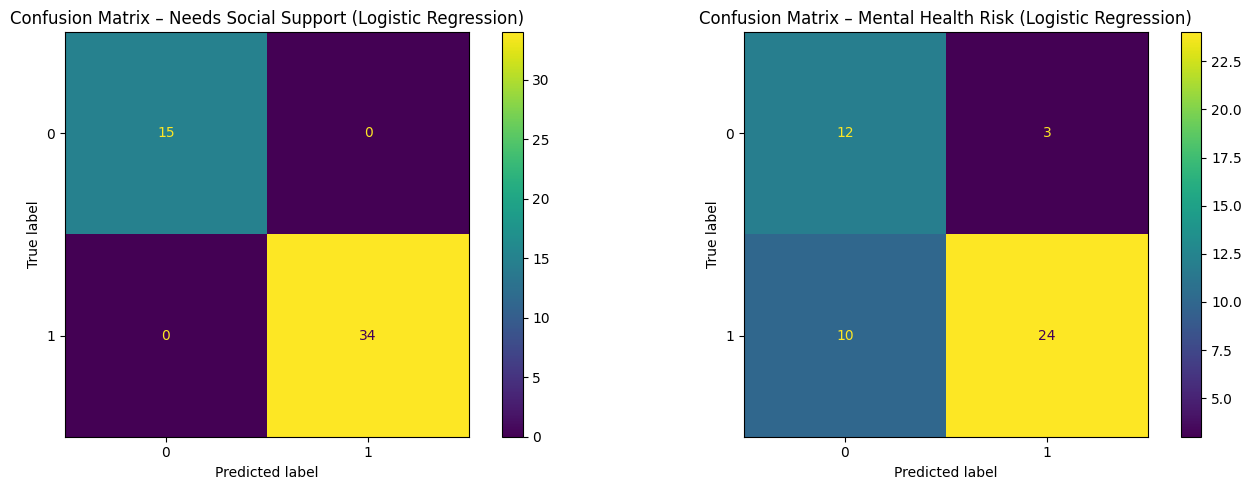

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Needs Social Support
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, ax=axes[0]
)
axes[0].set_title("Confusion Matrix – Needs Social Support (Logistic Regression)")

# Mental Health Risk
ConfusionMatrixDisplay.from_predictions(
    y_test_m, y_pred_m, ax=axes[1]
)
axes[1].set_title("Confusion Matrix – Mental Health Risk (Logistic Regression)")

plt.tight_layout()
plt.show()

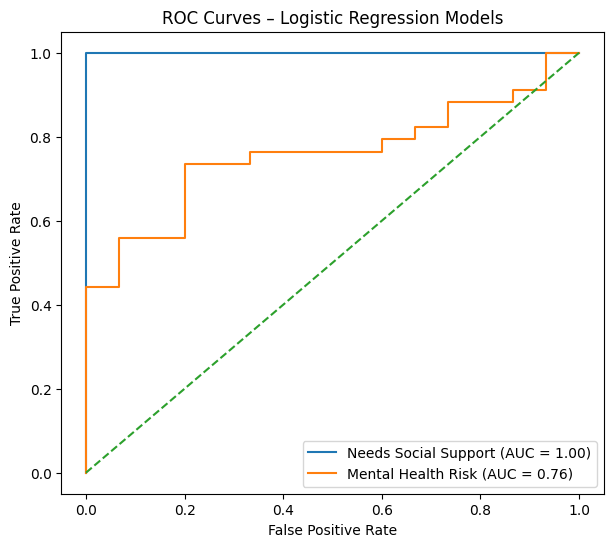

In [52]:
from sklearn.metrics import roc_curve, auc

# Probabilities
y_prob_support = log_reg.predict_proba(X_test)[:, 1]
y_prob_mental = log_reg_m.predict_proba(X_test_m)[:, 1]

# ROC values
fpr_s, tpr_s, _ = roc_curve(y_test, y_prob_support)
fpr_m, tpr_m, _ = roc_curve(y_test_m, y_prob_mental)

auc_s = auc(fpr_s, tpr_s)
auc_m = auc(fpr_m, tpr_m)

plt.figure(figsize=(7, 6))
plt.plot(fpr_s, tpr_s, label=f"Needs Social Support (AUC = {auc_s:.2f})")
plt.plot(fpr_m, tpr_m, label=f"Mental Health Risk (AUC = {auc_m:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Logistic Regression Models")
plt.legend()
plt.show()

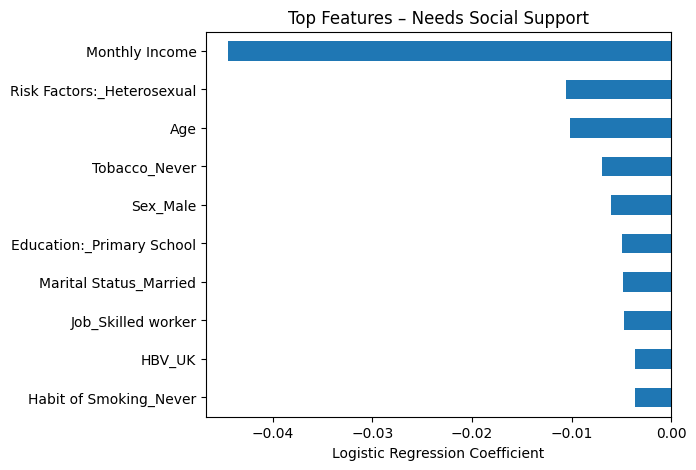

In [53]:
import pandas as pd

support_importance = pd.Series(
    log_reg.coef_[0],
    index=X_encoded.columns
).sort_values(key=abs, ascending=False).head(10)

plt.figure(figsize=(6, 5))
support_importance.plot(kind='barh')
plt.title("Top Features – Needs Social Support")
plt.xlabel("Logistic Regression Coefficient")
plt.gca().invert_yaxis()
plt.show()

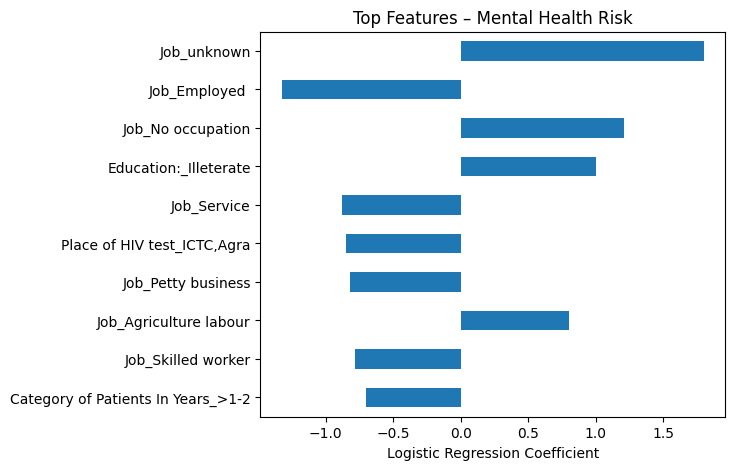

In [54]:
mental_importance = pd.Series(
    log_reg_m.coef_[0],
    index=X_mental_encoded.columns
).sort_values(key=abs, ascending=False).head(10)

plt.figure(figsize=(6, 5))
mental_importance.plot(kind='barh')
plt.title("Top Features – Mental Health Risk")
plt.xlabel("Logistic Regression Coefficient")
plt.gca().invert_yaxis()
plt.show()

<h1>Analysis Conclusion -

<h3>RESULT 1 — Ground-Truth (Actual Need in Population)

What this shows:

- Out of the total population, how many people actually need support / are at mental-health risk (based on engineered labels).

In [55]:
# Total number of individuals
total = len(df_model)

# Needs Social Support (actual)
support_counts = df_model['Needs_Social_Support'].value_counts()
support_percent = df_model['Needs_Social_Support'].value_counts(normalize=True) * 100

# Mental Health Risk (actual)
mental_counts = df_model['Mental_Health_Risk'].value_counts()
mental_percent = df_model['Mental_Health_Risk'].value_counts(normalize=True) * 100

print("=== ACTUAL DISTRIBUTION ===\n")

print("Needs Social Support:")
print(support_counts)
print(support_percent.round(2), "\n")

print("Mental Health Risk:")
print(mental_counts)
print(mental_percent.round(2))

=== ACTUAL DISTRIBUTION ===

Needs Social Support:
Needs_Social_Support
1    138
0     58
Name: count, dtype: int64
Needs_Social_Support
1    70.41
0    29.59
Name: proportion, dtype: float64 

Mental Health Risk:
Mental_Health_Risk
1    138
0     58
Name: count, dtype: int64
Mental_Health_Risk
1    70.41
0    29.59
Name: proportion, dtype: float64


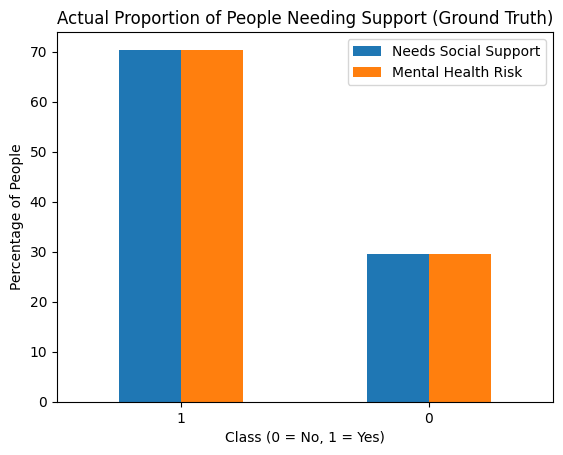

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

# Ground-truth percentages
support_actual = df_model['Needs_Social_Support'].value_counts(normalize=True) * 100
mental_actual = df_model['Mental_Health_Risk'].value_counts(normalize=True) * 100

# Combine into a dataframe
actual_df = pd.DataFrame({
    'Needs Social Support': support_actual,
    'Mental Health Risk': mental_actual
})

# Plot
actual_df.plot(kind='bar')
plt.title("Actual Proportion of People Needing Support (Ground Truth)")
plt.ylabel("Percentage of People")
plt.xlabel("Class (0 = No, 1 = Yes)")
plt.xticks(rotation=0)
plt.show()

- “Around 70% of the study population falls into the category of needing social support and mental-health intervention, indicating a high vulnerability burden.”

<h3>RESULT 2 — Model-Predicted Need (Logistic Regression)

What this shows:

- If the Logistic Regression model is deployed, how many people would be flagged as needing support.

In [57]:
# Predictions from Logistic Regression models
pred_support = log_reg.predict(X_test)
pred_mental = log_reg_m.predict(X_test_m)

# Support prediction
support_pred_counts = pd.Series(pred_support).value_counts()
support_pred_percent = pd.Series(pred_support).value_counts(normalize=True) * 100

# Mental health prediction
mental_pred_counts = pd.Series(pred_mental).value_counts()
mental_pred_percent = pd.Series(pred_mental).value_counts(normalize=True) * 100

print("=== MODEL PREDICTIONS (TEST SET) ===\n")

print("Needs Social Support (Predicted):")
print(support_pred_counts)
print(support_pred_percent.round(2), "\n")

print("Mental Health Risk (Predicted):")
print(mental_pred_counts)
print(mental_pred_percent.round(2))

=== MODEL PREDICTIONS (TEST SET) ===

Needs Social Support (Predicted):
1    34
0    15
Name: count, dtype: int64
1    69.39
0    30.61
Name: proportion, dtype: float64 

Mental Health Risk (Predicted):
1    27
0    22
Name: count, dtype: int64
1    55.1
0    44.9
Name: proportion, dtype: float64


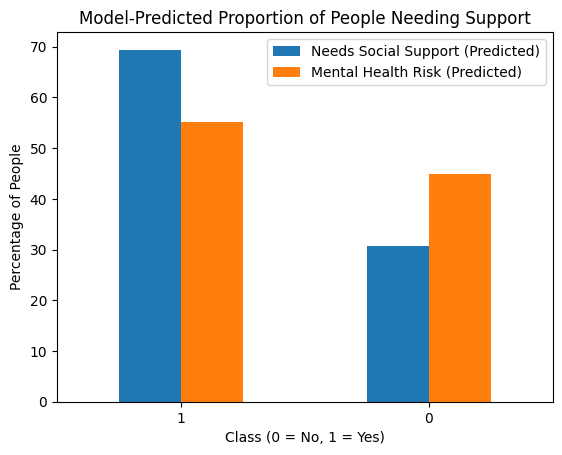

In [58]:
# Logistic Regression predictions
pred_support = log_reg.predict(X_test)
pred_mental = log_reg_m.predict(X_test_m)

# Convert to percentages
support_pred_pct = pd.Series(pred_support).value_counts(normalize=True) * 100
mental_pred_pct = pd.Series(pred_mental).value_counts(normalize=True) * 100

# Combine into a dataframe
pred_df = pd.DataFrame({
    'Needs Social Support (Predicted)': support_pred_pct,
    'Mental Health Risk (Predicted)': mental_pred_pct
})

# Plot
pred_df.plot(kind='bar')
plt.title("Model-Predicted Proportion of People Needing Support")
plt.ylabel("Percentage of People")
plt.xlabel("Class (0 = No, 1 = Yes)")
plt.xticks(rotation=0)
plt.show()

- “The Logistic Regression model predicts a similar proportion of individuals as high-risk, demonstrating consistency between engineered labels and model predictions.”

<h1>“What % of people need care?”

<h3>Ground Truth vs LR Prediction - Need Social Support

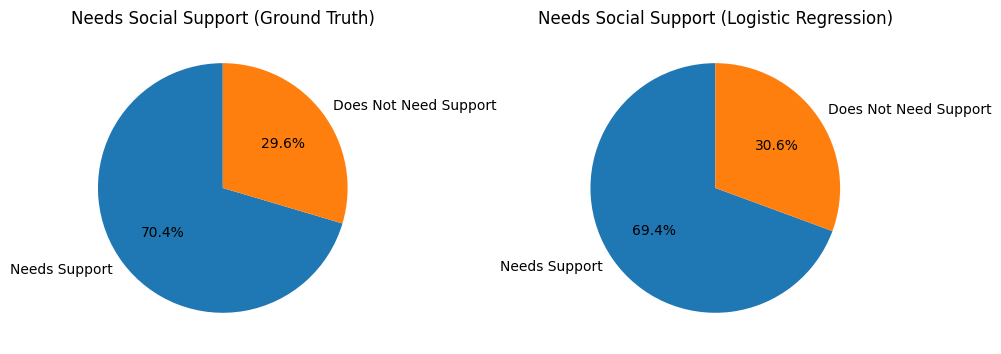

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# ---------- Needs Social Support ----------

# Ground truth
support_actual_pct = df_model['Needs_Social_Support'].value_counts(normalize=True) * 100
support_actual_pct = support_actual_pct.reindex([1, 0], fill_value=0)

# Logistic Regression prediction
support_pred = pd.Series(log_reg.predict(X_test))
support_pred_pct = support_pred.value_counts(normalize=True) * 100
support_pred_pct = support_pred_pct.reindex([1, 0], fill_value=0)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Ground truth pie
axes[0].pie(
    support_actual_pct,
    labels=['Needs Support', 'Does Not Need Support'],
    autopct='%1.1f%%',
    startangle=90
)
axes[0].set_title("Needs Social Support (Ground Truth)")

# Predicted pie
axes[1].pie(
    support_pred_pct,
    labels=['Needs Support', 'Does Not Need Support'],
    autopct='%1.1f%%',
    startangle=90
)
axes[1].set_title("Needs Social Support (Logistic Regression)")

plt.tight_layout()
plt.show()

- “Approximately 70% of individuals require social support, and the Logistic Regression model predicts a similar proportion, indicating consistency between observed vulnerability and model predictions.”

<h3>Pie Chart 2 - Mental Health Risk

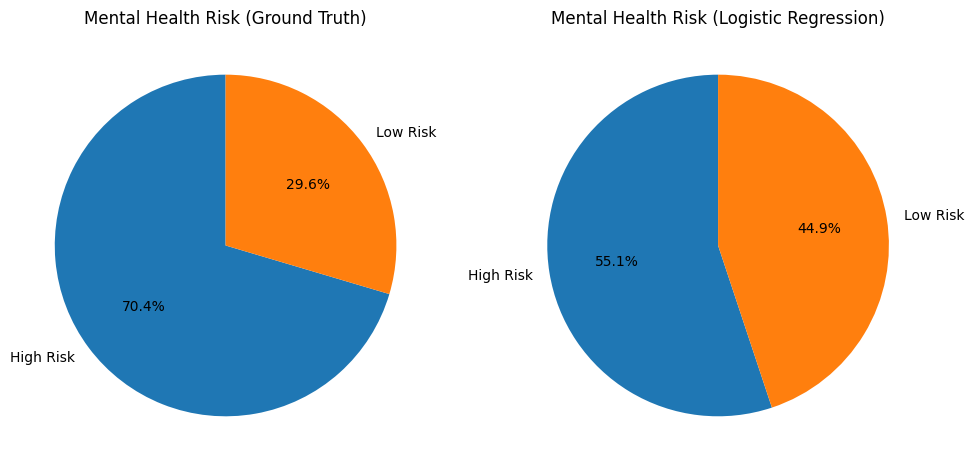

In [61]:
# ---------- Mental Health Risk ----------

# Ground truth
mental_actual_pct = df_model['Mental_Health_Risk'].value_counts(normalize=True) * 100
mental_actual_pct = mental_actual_pct.reindex([1, 0], fill_value=0)

# Logistic Regression prediction
mental_pred = pd.Series(log_reg_m.predict(X_test_m))
mental_pred_pct = mental_pred.value_counts(normalize=True) * 100
mental_pred_pct = mental_pred_pct.reindex([1, 0], fill_value=0)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Ground truth pie
axes[0].pie(
    mental_actual_pct,
    labels=['High Risk', 'Low Risk'],
    autopct='%1.1f%%',
    startangle=90
)
axes[0].set_title("Mental Health Risk (Ground Truth)")

# Predicted pie
axes[1].pie(
    mental_pred_pct,
    labels=['High Risk', 'Low Risk'],
    autopct='%1.1f%%',
    startangle=90
)
axes[1].set_title("Mental Health Risk (Logistic Regression)")

plt.tight_layout()
plt.show()

<h3> Key Insight from Analysis -

- About 7 out of 10 people need social and mental-health support.

<h2>Policy Recommendations :      

1. Expand Social Support Programs -

- Since around 70% of individuals require social support, public-health systems should strengthen financial aid, employment assistance, and welfare linkage programs.

2. Integrate Mental-Health Screening into Primary Care-

- Routine mental-health screening should be included in regular health visits to enable early identification and timely intervention.

3. Use ML Models as Screening Tools -

- Logistic Regression – based models should be used to flag high-risk individuals, while final decisions should remain with healthcare and social-work professionals.

4. Focus on Employment and Education Interventions -

- Policies should prioritize job creation, skill development, and adult education, as these are key drivers of both social and mental-health vulnerability.

5. Adopt Population-Level Interventions -

- Given the high prevalence of vulnerability, community-based and area-level programs are more effective than narrowly targeted individual interventions.

6. Improve Data Collection and Monitoring -

- Strengthening data on social and mental-health indicators will improve future predictions and support evidence-based policymaking.

<h3>One-Line Summary -

- The findings support population-level social and mental-health interventions, guided by interpretable ML-based screening tools.